<a id='intro'></a>

# Program for International Students' Assesments (PISA) 2012

PISA is a survey for students on their skills and knowledge as they approach the end of their education. The survey aims to:

+	Examine how well students have learned the school curriculum
+	How prepared students are for life beyond school.

The PISA 2012 survey assessed the competencies of 15-year-olds in reading, mathematics and science. Sixty-five countries partook in this assessment. Some countries, 44 in total, opted for an optional assessment of creative problem-solving. Also, in 18 countries, the students were tested on financial literacy.

The countries that participated in the survey/test can be found [here](https://docs.google.com/spreadsheets/d/10UzRBlSiM2RkI6EcT9bqCnjW12goMy834caJ04cQCqQ/edit?usp=sharing)

    
## Table of Contents

<ul>
    <li><a href="#intro">Introduction </a></li>
<li><a href="#import">Importing Libraries and Data</a></li>   
<li><a href="#school">Part 1 : Life in School</a></li>
    <ul>
    <li> <a href="#school1">Research Question 1</a> </li>
    <li> <a href="#school2">Research Question 2</a> </li>
    <li> <a href="#school3">Research Question 3</a> </li>
    <li> <a href="#school4">Research Question 4</a> </li>
     </ul>
<li><a href="#outside">Part 2 : Life after School</a></li>
    <ul>
    <li> <a href="#outside1">Research Question 1</a> </li>
    </ul>

</ul>


<a id='import'></a>

### Importing Libraries & Loading Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

import warnings
warnings.filterwarnings("ignore")

In [2]:
with zipfile.ZipFile("pisa2012.csv.zip") as w:
    with w.open("pisa2012.csv") as file:
        df = pd.read_csv(file,encoding = 'latin')
        
df = df.drop(['Unnamed: 0'],1)
df.head()

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,9,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,8,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,10,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


The first part of this project examines factors influencing the school performance of students. This section includes all the countries. The columns with a lot of missing values (50,000 out of 500,000 students) are excluded from the analysis to prevent possible bias. 

The second part of the project covers only after school readiness and only includes the countries where those qualities are tested. 

<a id='school'></a>

### Part 1 : Life in School

In [3]:
def handling_missing_values(data,size):
    
    '''
    This function helps to handle missing data for columns that have a lot of misisng data. 
    
    Input : Data - The dataframe to be examined
            Size - This is the cut-off number of missing values 
    
    Output: The columns whose number of missing values reach/exceed the provided size
    
    '''
    
    list1 = data.columns

    list2 = []
    for i in list1:
        w = data[i].isnull().sum()
        list2.append(w)

    no_of_missing = pd.Series(list2,index=list1)

    many_missing = list(no_of_missing[no_of_missing >= size].index)
    
    return many_missing

In [4]:
columns_to_remove = handling_missing_values(df,50000)

In [5]:
data = df.drop(columns_to_remove,1)
data.head()

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,9,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,8,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,10,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


<a id='school1'></a>

#### Research Question 1 : Does Educational Qualification/Job Status of Parent influence Truancy of Child in School?

There are 3 categories of truancy examined in the data provided: 

+ Lateness to school
+ Skipping classes within school day
+ Skipping the whole school day

Feature engineering is done by calculating the total truancy score (0 - lowest, 100 - highest) for each student.

In [6]:
truancy = data[['ST08Q01', 'ST09Q01','ST115Q01','ST13Q01','ST15Q01','ST17Q01','ST19Q01']]
for i in truancy.columns:
    mode = truancy[i].mode()[0]
    truancy[i] = truancy[i].fillna(mode)

In [7]:
truancy = truancy.replace({'None':0, 'One or two times':1,'Three or four times':2,
                           'Five or more times':4,'She did not complete <ISCED level 1>': 'Incomplete <ISCED level 1>',
                          'He did not complete <ISCED level 1>':'Incomplete <ISCED level 1>'},regex=True)

In [8]:
truancy['ST115Q01'] = truancy['ST115Q01']
truancy_score = round((truancy['ST115Q01']+ truancy['ST09Q01'] + truancy['ST08Q01'])/12*100,1)
truancy['Score'] = truancy_score

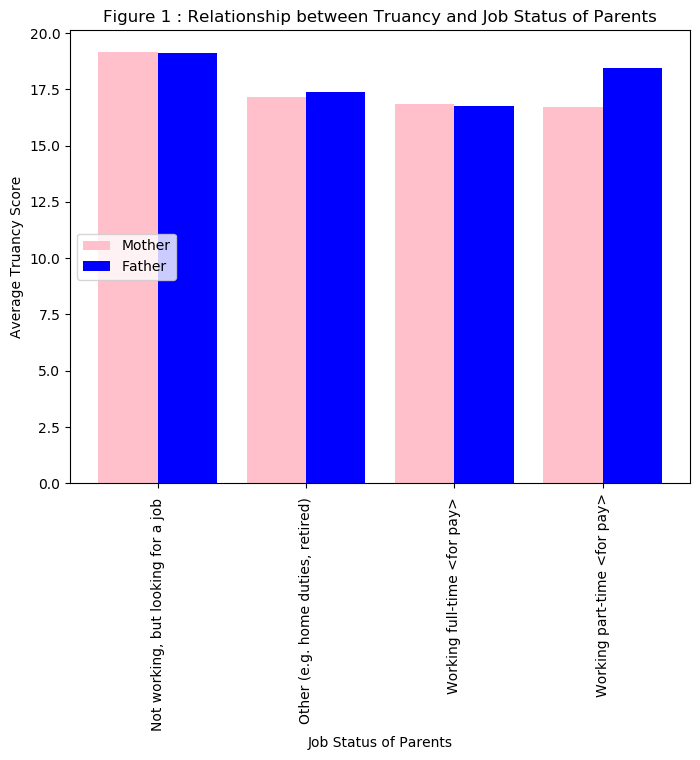

In [9]:
mother = truancy.groupby(['ST15Q01'])['Score'].mean()
father = truancy.groupby(['ST19Q01'])['Score'].mean()

plt.figure(figsize=(8, 6), dpi=100)

X = list(mother.index)
Y = list(father.index)
Xvalues = mother.values
Yvalues = father.values

X_axis = np.arange(0,4)
plt.bar(X_axis - 0.2, Xvalues, 0.4, label = 'Mother', color='pink')
plt.bar(X_axis + 0.2, Yvalues, 0.4, label = 'Father',color='blue')
plt.xticks(X_axis, X, rotation=90)
plt.legend(loc=6)
  
plt.xlabel("Job Status of Parents")
plt.ylabel("Average Truancy Score")
plt.title("Figure 1 : Relationship between Truancy and Job Status of Parents");

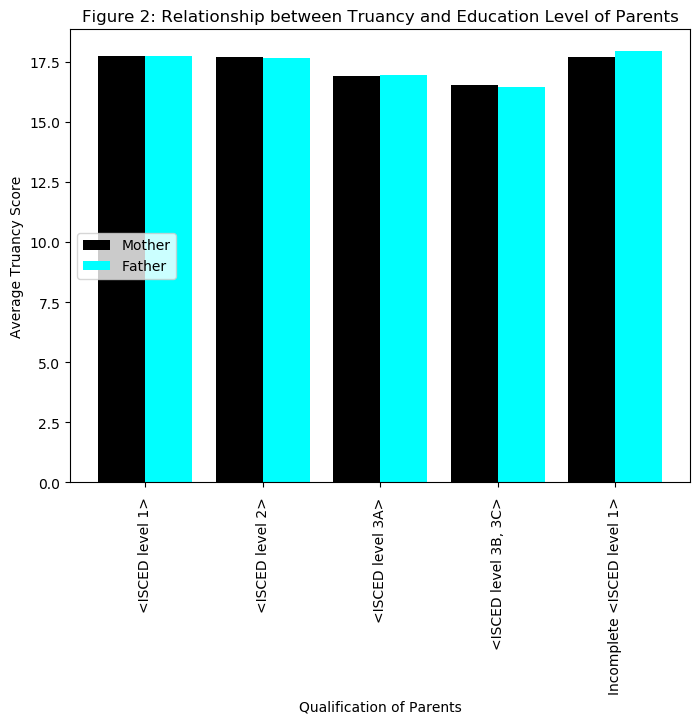

In [10]:
mother2 = truancy.groupby(['ST13Q01'])['Score'].mean()
father2 = truancy.groupby(['ST17Q01'])['Score'].mean()


plt.figure(figsize=(8, 6), dpi=100)
X = list(mother2.index)
Y = list(father2.index)
Xvalues = mother2.values
Yvalues = father2.values

X_axis = np.arange(0,5)
plt.bar(X_axis - 0.2, Xvalues, 0.4, label = 'Mother', color='black')
plt.bar(X_axis + 0.2, Yvalues, 0.4, label = 'Father',color='cyan')
plt.xticks(X_axis, X, rotation=90)
plt.legend(loc=6)

  
plt.xlabel("Qualification of Parents")
plt.ylabel("Average Truancy Score")
plt.title("Figure 2: Relationship between Truancy and Education Level of Parents");

#### Observations

Based on the charts in Figure 1 and 2 above the following insights can be established:

+ Parents who are working full time have kids with a lower truancy score, the result is slightly lower for fathers who are working full time. 

+ While there is a low truancy score for mothers who are working part-time, the score is higher when fathers are working part-time

+ Unemployed parents have a negative influence on the truancy score of their children as this category has the highest average truancy score. 

+ Parents who did not complete their primary education (ISCED 1) tend to have children with the highest truancy score. The effect is more in fathers than in mothers

+ Truancy score tend to reduce as educational qualification increases. 

<a id='school2'></a>

#### Research Question 2 : Are there differences in reading scores of students based on certain possesions?

Two possesions are identified that can possibly have an effect on the Reading Score of students and they are: 
+ Literature 
+ Poetry

The total reading scores is computed and scaled (0 - lowest, 100 - Highest)


In [11]:
possesion_reading = data[['PV1READ','PV2READ','PV3READ','PV4READ','PV5READ','ST26Q07','ST26Q08']]

In [12]:
values = possesion_reading['PV1READ'] + possesion_reading['PV2READ'] + possesion_reading['PV3READ'] + possesion_reading['PV4READ'] + possesion_reading['PV5READ']
values_pct = round(values/values.max()*100)
possesion_reading['Reading_Score'] = values_pct
possesion_reading.rename(columns = {'ST26Q07':'Literature', 'ST26Q08':'Poetry','ST26Q09':'Art','ST26Q10':'Textbooks'}, inplace = True)
possesion_reading = possesion_reading.drop(['PV1READ','PV2READ','PV3READ','PV4READ','PV5READ'],1)

In [13]:
possesion_reading.Reading_Score.describe()

count    485490.000000
mean         55.571202
std          11.642974
min           1.000000
25%          48.000000
50%          56.000000
75%          64.000000
max         100.000000
Name: Reading_Score, dtype: float64

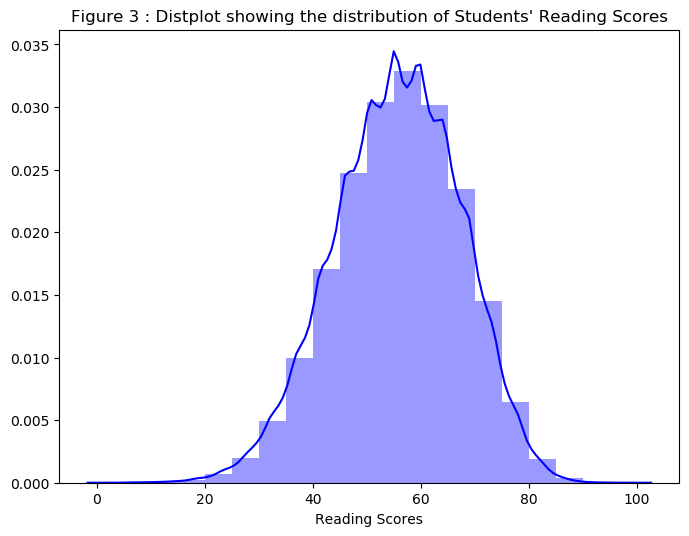

In [14]:
plt.figure(figsize=(8, 6), dpi=100)

bins = np.arange(0,possesion_reading.Reading_Score.max()+5,5)
sns.distplot(possesion_reading.Reading_Score, bins=bins, color='blue')
plt.title("Figure 3 : Distplot showing the distribution of Students' Reading Scores")
plt.xlabel("Reading Scores");

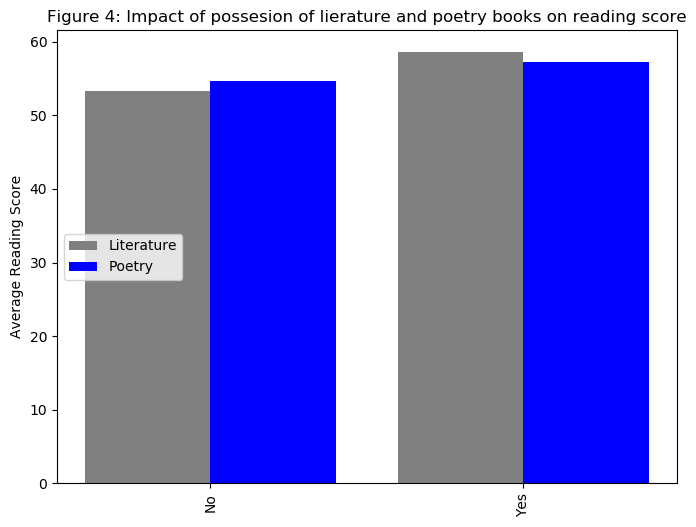

In [15]:
plt.figure(figsize=(8, 6), dpi=100)

lit = possesion_reading.groupby(['Literature'])['Reading_Score'].mean()
poet = possesion_reading.groupby(['Poetry'])['Reading_Score'].mean()

X = list(lit.index)
Y = list(poet.index)
Xvalues = lit.values
Yvalues = poet.values

X_axis = np.arange(0,2)
plt.bar(X_axis - 0.2, Xvalues, 0.4, label = 'lit', color='grey')
plt.bar(X_axis + 0.2, Yvalues, 0.4, label = 'poet',color='blue')
plt.xticks(X_axis, X, rotation=90)
plt.legend(['Literature','Poetry'],loc=6)
  
plt.ylabel("Average Reading Score")
plt.title("Figure 4: Impact of possesion of lierature and poetry books on reading score");

#### Observations

+ The distribution of the reading scores is approximately normal (Mean and Median fall between 50% and 60%).
+ Most students get an average score (between 50% and 60%)
+ Students with the specified possesions performed better than those who don't.
+ Students who possess literature perform better than those who possess poetry books.


<a id='school3'></a>

#### Research Question 3: Is there a correlation between Math and Science Scores of Students?

A common [hypothesis](https://www.researchgate.net/publication/234707959_A_Comparative_Study_of_Relationship_between_Mathematics_and_Science_Achievement_at_the_8th_Grade) is that good performance in Mathematics can be attributed to good scores in Science as well. 

The scores in each individual mathematics components as well as the general scores in mathematics as a whole is computed. The components used to analyze the knowledge of mathematics are as follows:

+ Change and Relationships
+ Quantity
+ Space and Shape
+ Uncertainity and Data
+ Employ
+ Formulate
+ Interprete

In [16]:
def sum_values (column):
    for i in range(len(column)):
        return(data[column[0]] + data[column[1]] + data[column[2]] + data[column[3]] + data[column[4]])

In [17]:
math = ['PV1MATH', 'PV2MATH','PV3MATH','PV4MATH','PV5MATH']
science = ['PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']
change = ['PV1MACC','PV2MACC','PV3MACC','PV4MACC','PV5MACC']
quantity = ['PV1MACQ', 'PV2MACQ', 'PV3MACQ', 'PV4MACQ','PV5MACQ']
shape = ['PV1MACS','PV2MACS','PV3MACS','PV4MACS','PV5MACS']
uncertain = ['PV1MACU','PV2MACU','PV3MACU','PV4MACS','PV5MACS']
employ = ['PV1MAPE','PV2MAPE','PV3MAPE','PV4MAPE','PV5MAPE']
formulate = ['PV1MAPF','PV2MAPF','PV3MAPF','PV4MAPF','PV5MAPF'] 
interprete = ['PV1MAPI','PV2MAPI','PV3MAPI','PV4MAPI','PV5MAPI']

In [18]:
math_score = sum_values(math)
science_score = sum_values(science)
change_df = sum_values(change)
quantity_df = sum_values(quantity)
shape_df = sum_values(shape)
uncertain_df = sum_values(uncertain)
employ_df = sum_values(employ)
formulate_df = sum_values(formulate)
interprete_df = sum_values(interprete)

In [19]:
math_df=pd.DataFrame(change_df,columns=['Change'])
math_df['Quantity'] = quantity_df
math_df['Shape'] = shape_df
math_df['Uncertain'] = uncertain_df
math_df['Employ'] = employ_df
math_df['Formulate']=formulate_df
math_df['Interprete'] = interprete_df

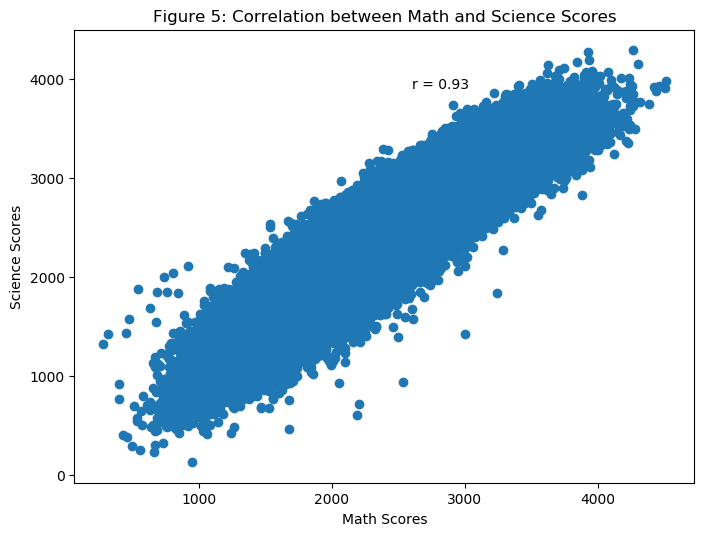

In [20]:
plt.figure(figsize=(8, 6), dpi=100)

plt.scatter(math_score, science_score)
plt.text(2600,3900,'r = {}'.format(round(math_score.corr(science_score),2)))
plt.xlabel("Math Scores")
plt.ylabel("Science Scores")
plt.title("Figure 5: Correlation between Math and Science Scores");

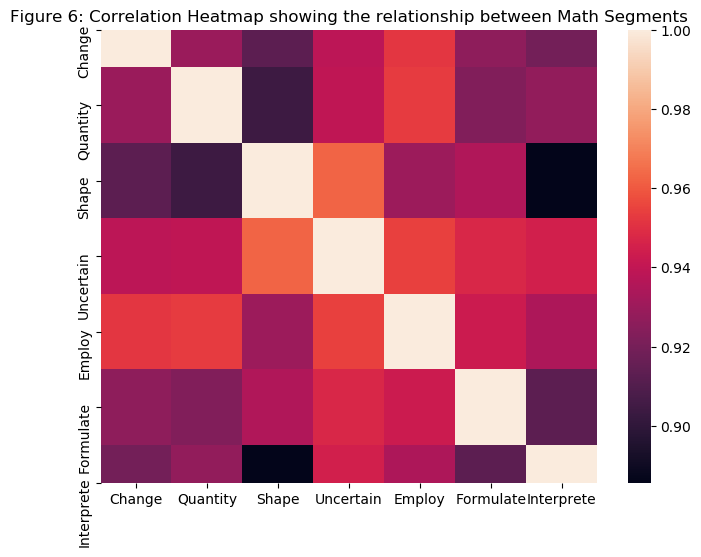

In [21]:
plt.figure(figsize=(8, 6), dpi=100)
sns.heatmap(math_df.corr())
plt.title("Figure 6: Correlation Heatmap showing the relationship between Math Segments")
plt.show()

#### Observation

+ There is a strong positive correlation between scores in Science and Mathematics (r = 0.98). The higher a student's score in mathematics, the higher the score in Science.

+ All mathematics categories have a strong correlation (r>= 0.90). 

However, the following combinations have a higher relationship than the rest.

   + Change & Relationship and Employ
   + Shape & Space and Uncertainity & Data
   + Quantity and Employ
   + Employ and Uncertainity & Data

<a id='school4'></a>

#### Research Question 4 : Are there differences in Grade or Truancy Score based on Gender

The Grade variable is presented in a 7-point likert scale (with a neutral point). For better reference, the scales are renamed to fit the following: 

+ 3.0 - Excellent
+ 2.0 - Very Good
+ 1.0 - Good
+ 0.0 - Average
+ -1.0 - Below Average
+ -2.0 - Poor
+ -3.0 - Very Poor

Truancy has been linked often times to poor academic performance. Also, there are popular opinions that young males are more truant than their female counterparts. The visuals below served as a means to ascertain these claims

In [22]:
gender_grade = data[['ST04Q01','GRADE']]

In [23]:
gender_grade = gender_grade.replace({3.0:'Excellent',2.0:'Very Good',1.0:'Good',0.0:'Average',-1.0:'Below Average',
                     -2.0:'Poor',-3.0:'Very Poor'},regex=True)

In [24]:
male_grades = gender_grade[gender_grade['ST04Q01'] == 'Male']['GRADE'].value_counts([0]).index
male_values = gender_grade[gender_grade['ST04Q01'] == 'Male']['GRADE'].value_counts([0]).values

female_grades = gender_grade[gender_grade['ST04Q01'] == 'Female']['GRADE'].value_counts([0]).index
female_values = gender_grade[gender_grade['ST04Q01'] == 'Female']['GRADE'].value_counts([0]).values

In [25]:
def add_text_percent(chart_name, axvalue):
    '''
    
    This funcion collects the axis and chart name from user and adds text (percentage) to the specified bar charts
    
    '''
    for i in chart_name:
        height = i.get_height()
        axvalue.annotate('{}%'.format(round(height*100,3)),
        xy = (i.get_x() + i.get_width() /4, height),
        xytext = (0,2), textcoords = "offset points", ha='center')
        

def add_text_value(chart_name, axvalue):
    '''
    
    This funcion collects the axis and chart name from user and adds text (actual values) to the specified bar charts
    
    '''
    for i in chart_name:
        height = i.get_height()
        axvalue.annotate('{}'.format(round(height,2)),
        xy = (i.get_x() + i.get_width() /4, height),
        xytext = (0,2), textcoords = "offset points", ha='center')

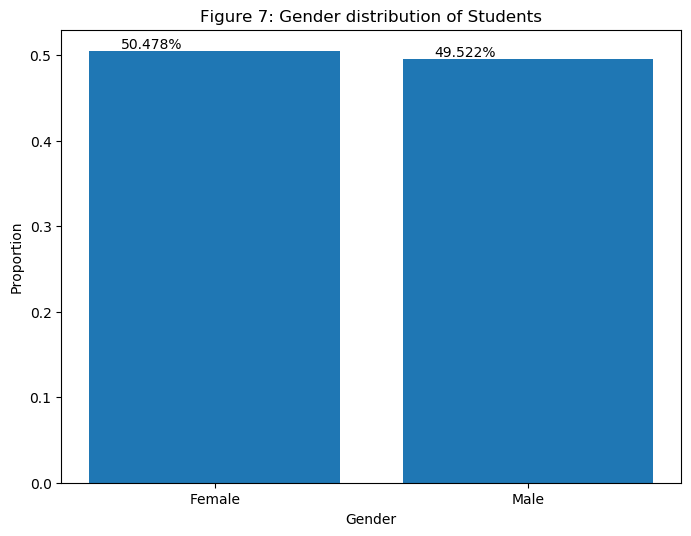

In [26]:
fig, ax = plt.subplots(figsize = (8,6), dpi=100)
x= gender_grade.ST04Q01.value_counts().index
y = gender_grade.ST04Q01.value_counts([0]).values
gender_plot = ax.bar(x,y)

add_text_percent(gender_plot,plt)

plt.title("Figure 7: Gender distribution of Students")
plt.ylabel("Proportion")
plt.xlabel("Gender")
plt.show()

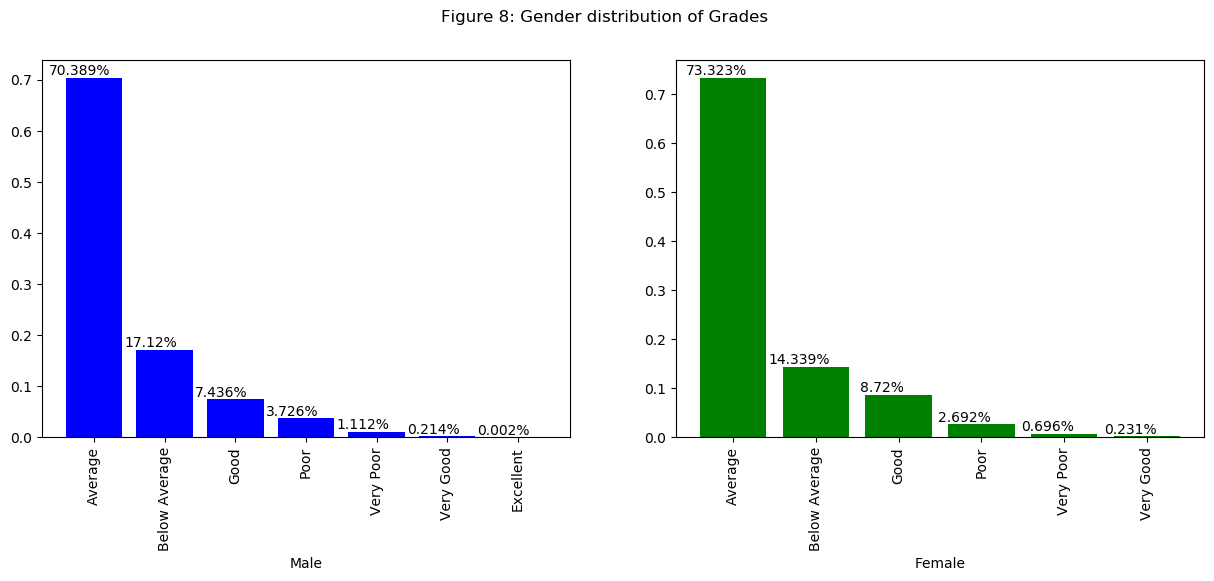

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (15,5), dpi=100)

male = ax[0].bar(male_grades, male_values,color='blue')

female = ax[1].bar(female_grades, female_values, color='green')
        
add_text_percent(male,ax[0])
add_text_percent(female,ax[1])


ax[0].tick_params(axis='x', rotation = 90)
ax[1].tick_params(axis='x', rotation = 90)
ax[0].set_xlabel("Male")
ax[1].set_xlabel("Female")
plt.suptitle("Figure 8: Gender distribution of Grades")
plt.show()

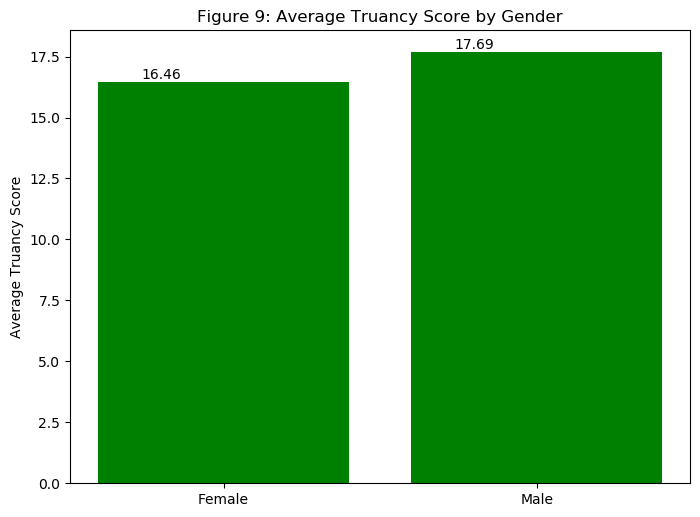

In [28]:
truancy['Gender'] = data['ST04Q01']
plt.figure(figsize=(8, 6), dpi=100)
x = truancy.groupby(['Gender'])['Score'].mean()

x_index = x.index
x_values = x.values

plota = plt.bar(x_index,x_values, color='g')
add_text_value(plota,plt)

plt.ylabel("Average Truancy Score")
plt.title("Figure 9: Average Truancy Score by Gender");

In [29]:
grade = gender_grade.GRADE
truancy['GRADE'] = grade

In [30]:
truancy_grade = truancy.groupby(['GRADE'])['Score'].mean().sort_values()

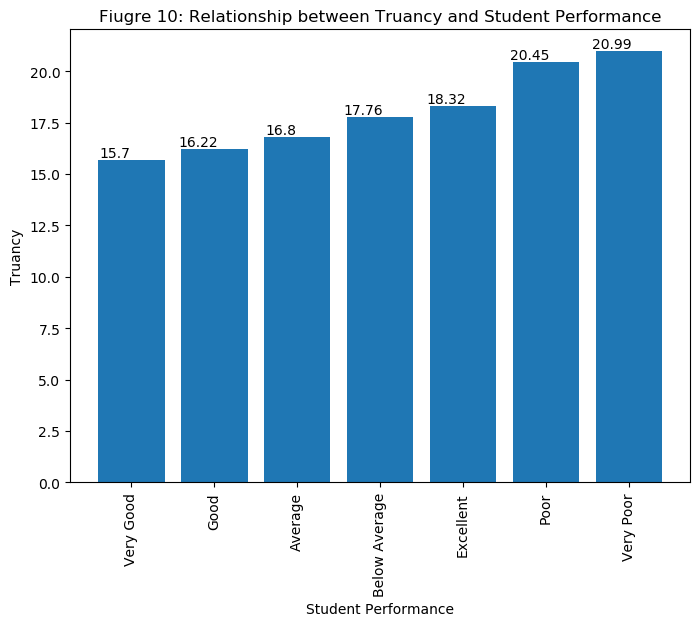

In [31]:
plt.figure(figsize=(8, 6), dpi=100)

plot = plt.bar(truancy_grade.index, truancy_grade.values)
add_text_value(plot,plt)

plt.title("Fiugre 10: Relationship between Truancy and Student Performance")
plt.xlabel("Student Performance")
plt.ylabel("Truancy")
plt.xticks(rotation=90)
plt.show()

#### Observation

+ The proportion of Males is approximately equal to the proportion of females
+ A higher percentage of females performed better than males
+ No female got an "Excellent" score, only males had excellent scores
+ Lower truancy scores attracts better grades on average. 

However, the "excellent" grade has a high truancy score when compared to the other average/above average grades. Since only males have an excellent grade, the truancy score is also tested by Gender. 

+ On average, males have a higher truancy score than females. 

<a id='outside'></a>

### Part 2 : Life after School
Not all schools/countries participated in 'life-after-school' survey such as Financial Literacy and Creative problem solving. As a result, the missing values are exempted from the analysis (rather than replaced with substitutes) for avoidance of possible bias. 

In [ ]:
variables = ['EC03Q01', 'EC03Q02', 'EC03Q03', 'EC03Q04', 'EC03Q05', 'EC04Q01A', 'EC04Q01B', 'EC04Q01C', 
  'EC04Q02A', 'EC04Q02B', 'EC04Q02C', 'EC04Q03A', 'EC04Q03B', 'EC04Q03C','EC04Q04A','EC04Q04B',
 'EC04Q04C','EC04Q05A', 'EC04Q05B','EC04Q05C','EC04Q06A', 'EC04Q06B','EC04Q06C','ST43Q01','ST43Q02','ST43Q03',
'ST43Q04','ST43Q05','ST43Q06','ST79Q10','ST87Q01','ST87Q02','ST87Q03','ST87Q04','ST87Q05','ST87Q06','ST87Q07','ST87Q08',
         'ST87Q09','GRADE','ST04Q01']

data2 = df[variables]

In [ ]:
data2 = data2.dropna()

<a id='outside1'></a>

#### Research Question 5 : What steps have been taken by students in preparation for life after school?

The future orientation variables are used to ascertain the preparation of students for life after school. Future Orientation entails: 
+ Internships
+ Job Fairs
+ Work Site Visits
+ Career Advisors (In School or Outside School)



In [209]:
future_orientation = data2[['EC03Q01', 'EC03Q02', 'EC03Q03', 'EC03Q04', 'EC03Q05']]
f_columns = ['Internship','Work Site Visits','Job Fair','Career Advisor-School','Career Advisor-Outside']
future_orientation.columns = f_columns

school = future_orientation[future_orientation['Career Advisor-School'] == 'Yes']['Career Advisor-School'].count()
outside_school = future_orientation[future_orientation['Career Advisor-Outside'] == 'Yes']['Career Advisor-Outside'].count()

career_advisor = {'In School': school, 'Outside School':outside_school}
career_advisor = pd.Series(career_advisor)

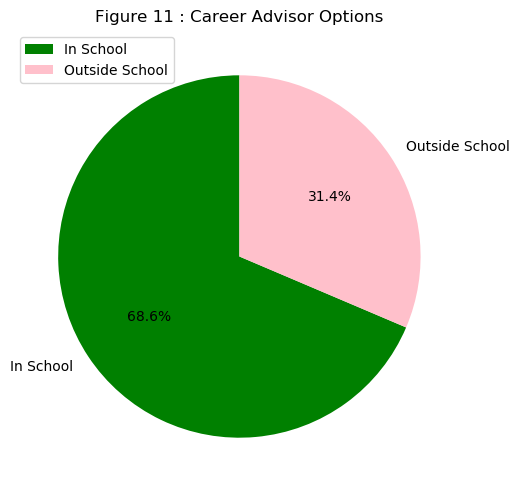

In [210]:
plt.figure(figsize=(8, 6), dpi=100)
career_advisor.plot.pie(startangle=90,colors=['g','pink'], autopct='%.1f%%')
plt.ylabel("")
plt.legend(loc=0)
plt.title("Figure 11 : Career Advisor Options")
plt.show()

In [211]:
future_orientation['Career_Advisor'] = pd.Series([])
future_orientation.Career_Advisor[(future_orientation['Career Advisor-School'] == 'Yes') | (future_orientation['Career Advisor-Outside'] == 'Yes')] ='Yes'
future_orientation.Career_Advisor = future_orientation.Career_Advisor.fillna('No') 

future_orientation.replace({'No, never':'No'}, regex=True, inplace=True)
future_orientation = future_orientation.drop(['Career Advisor-School', 'Career Advisor-Outside'],1)

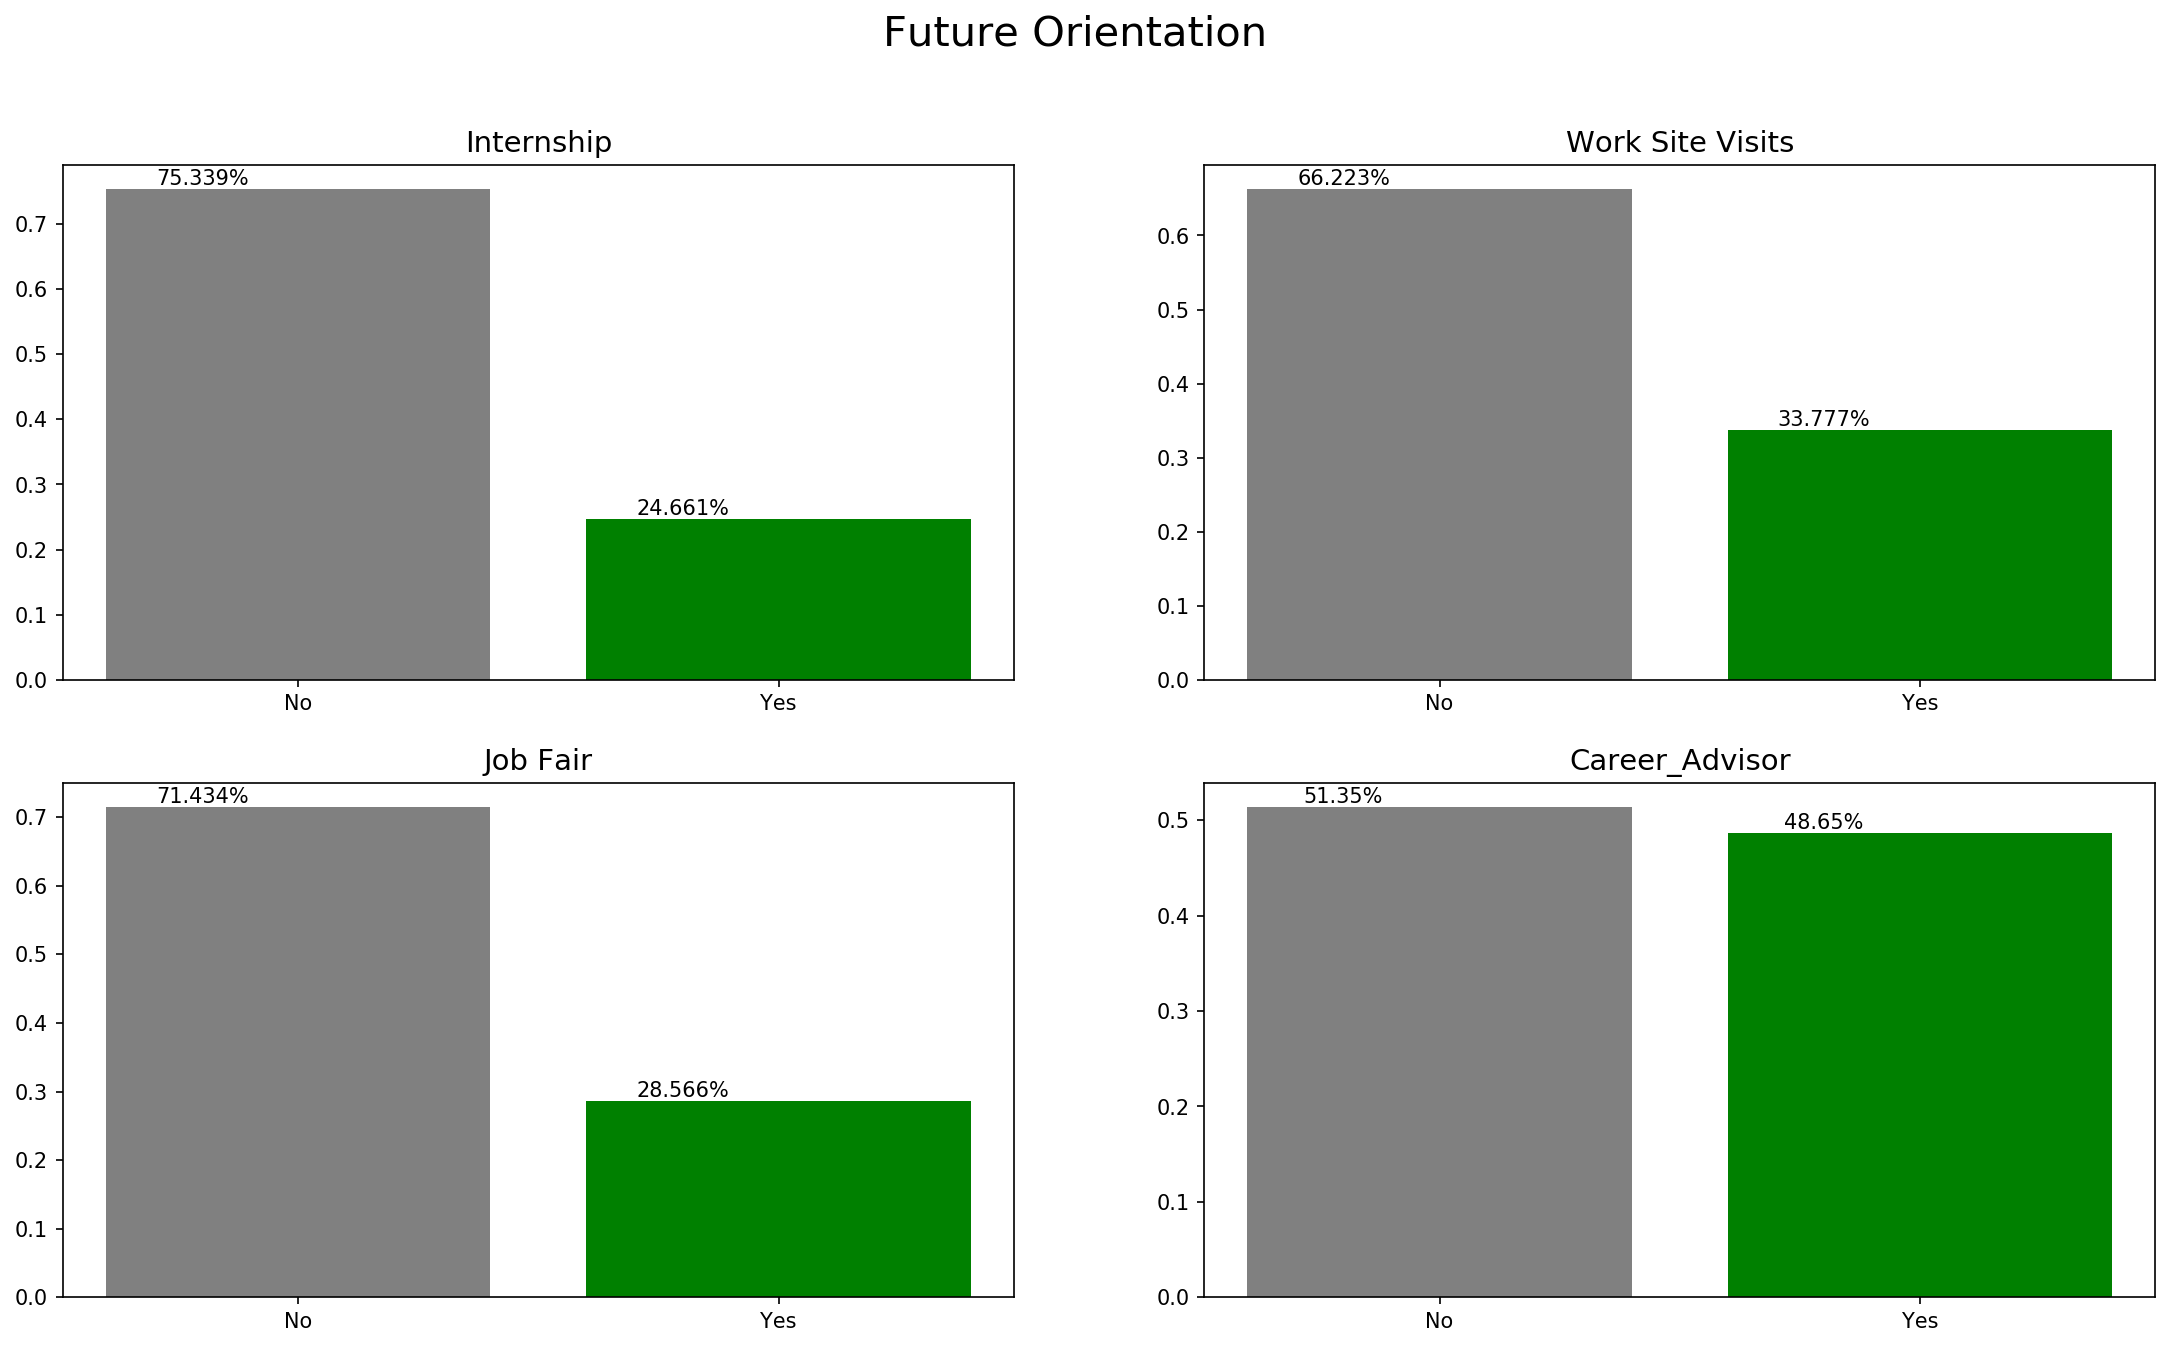

In [212]:
fig, ax = plt.subplots(2,2, figsize=(18,10), dpi=150)

def plot_bar (axis,variable):
    plot_a = axis.bar(future_orientation[variable].value_counts([0]).sort_index().index,
            future_orientation[variable].value_counts([0]).sort_index().values,
            color=['grey','green'])
    axis.set_title(variable, fontsize=14)
    add_text_percent(plot_a, axis)

plot_bar(ax[0][0], 'Internship')
plot_bar(ax[0][1], 'Work Site Visits')
plot_bar(ax[1][0], 'Job Fair')
plot_bar(ax[1][1], 'Career_Advisor')
plt.suptitle("Figure 12 : Future Orientation", fontsize=20);


#### Observation

+ Most students who have career advisors opt for inside school advisors
+ Career Advisors is the most prominent form of future orientation followed by Work Site visitation
+ Less than 25% of students have participated in Internships
+ In total, only about 34% of the students have a future orientation for work after school


### References

+ [Geek for Geeks : Creating Multiple Barcharts in Matplotlib](https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/)
+ [World Bank : ISCED Educational Levels](https://datatopics.worldbank.org/education/wRsc/classification)
+ [Tutorials Point : Adding Text to Bar Chart](https://www.tutorialspoint.com/adding-value-labels-on-a-matplotlib-bar-chart)
+ [Truancy and Academic Performance](https://infonomics-society.org/wp-content/uploads/ijcdse/published-papers/special-issue-volume-3-2013/Truancy-and-Academic-Performance-of-Secondary-School-Students-in-Southwestern-Nigeria.pdf)
+ [Prevalence of Truancy among Male Adolescents](https://capmh.biomedcentral.com/articles/10.1186/1753-2000-1-15#:~:text=While%20we%20found%20that%20males,truancy%20among%20adolescents%20%5B13%5D.)